# Introduction to Data Visualization with Matplotlib
Run the hidden code cell below to import the data used in this course.

In [19]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course datasets 
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

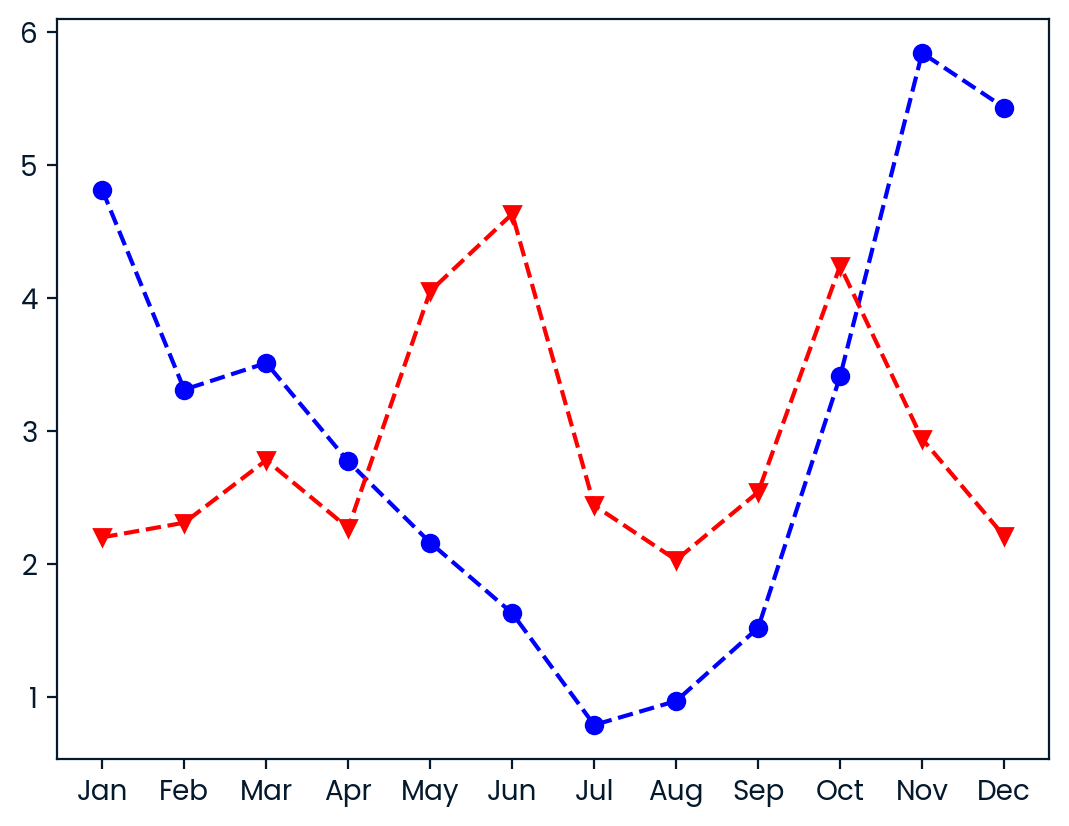

In [20]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='--')

# Call show to display the resulting plot
plt.show()

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Using `austin_weather` and `seattle_weather`, create a Figure with an array of two Axes objects that share a y-axis range (`MONTHS` in this case). Plot Seattle's and Austin's `MLY-TAVG-NORMAL` (for average temperature) in the top Axes and plot their `MLY-PRCP-NORMAL` (for average precipitation) in the bottom axes. The cities should have different colors and the line style should be different between precipitation and temperature. Make sure to label your viz!
- Using `climate_change`, create a twin Axes object with the shared x-axis as time. There should be two lines of different colors not sharing a y-axis: `co2` and `relative_temp`. Only include dates from the 2000s and annotate the first date at which `co2` exceeded 400.
- Create a scatter plot from `medals` comparing the number of Gold medals vs the number of Silver medals with each point labeled with the country name.
- Explore if the distribution of `Age` varies in different sports by creating histograms from `summer_2016`. 
- Try out [the different Matplotlib styles available](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and save your visualizations as a PNG file.

In [21]:
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Display the figure
plt.show()

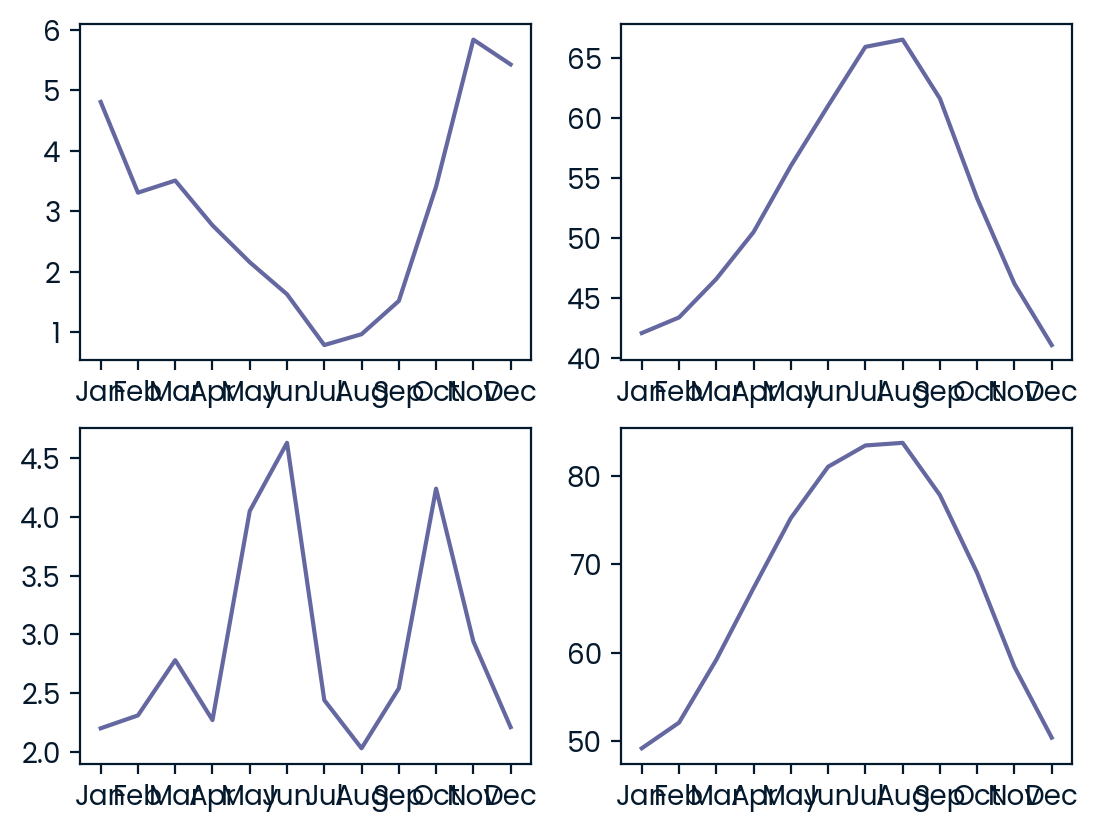

In [22]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2,2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

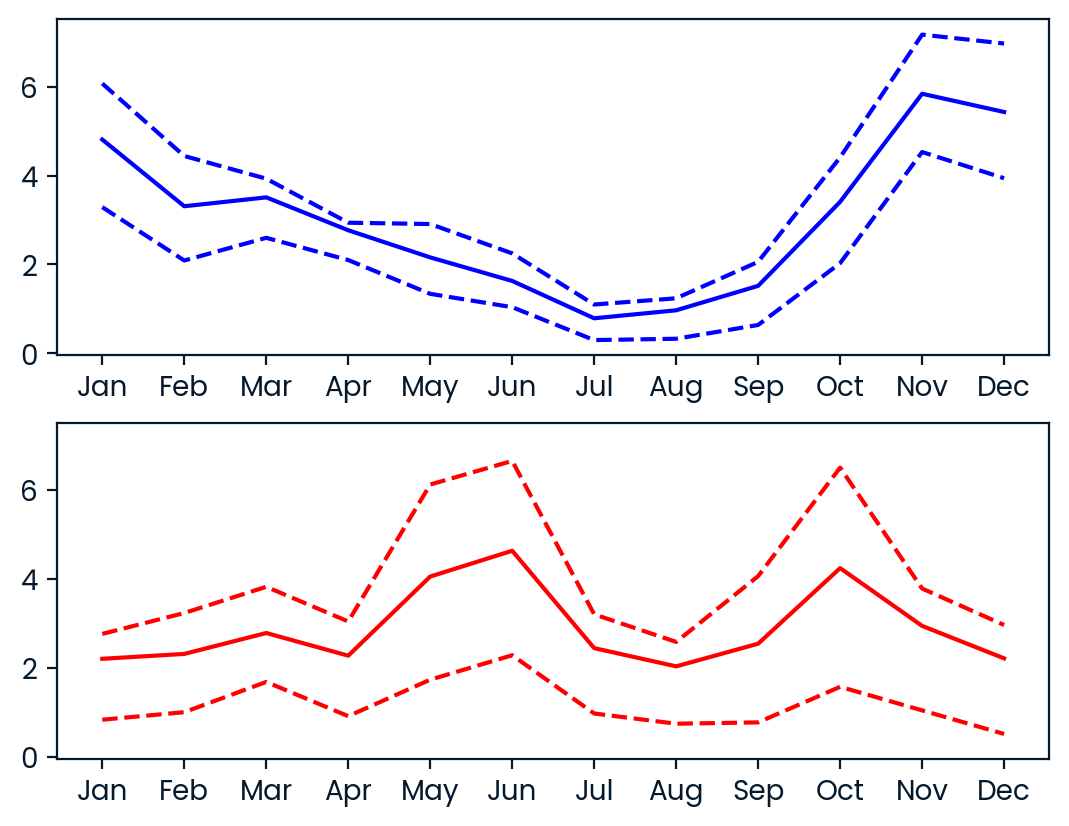

In [23]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color ='b')
ax[0].plot(seattle_weather['MONTH'], 
seattle_weather['MLY-PRCP-25PCTL'], color ='b', linestyle ='--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color ='r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle ='--')

plt.show()

# Plotting the Time Series Data

In [24]:
import pandas as pd
climate_change = pd.read_csv('datasets/climate_change.csv')

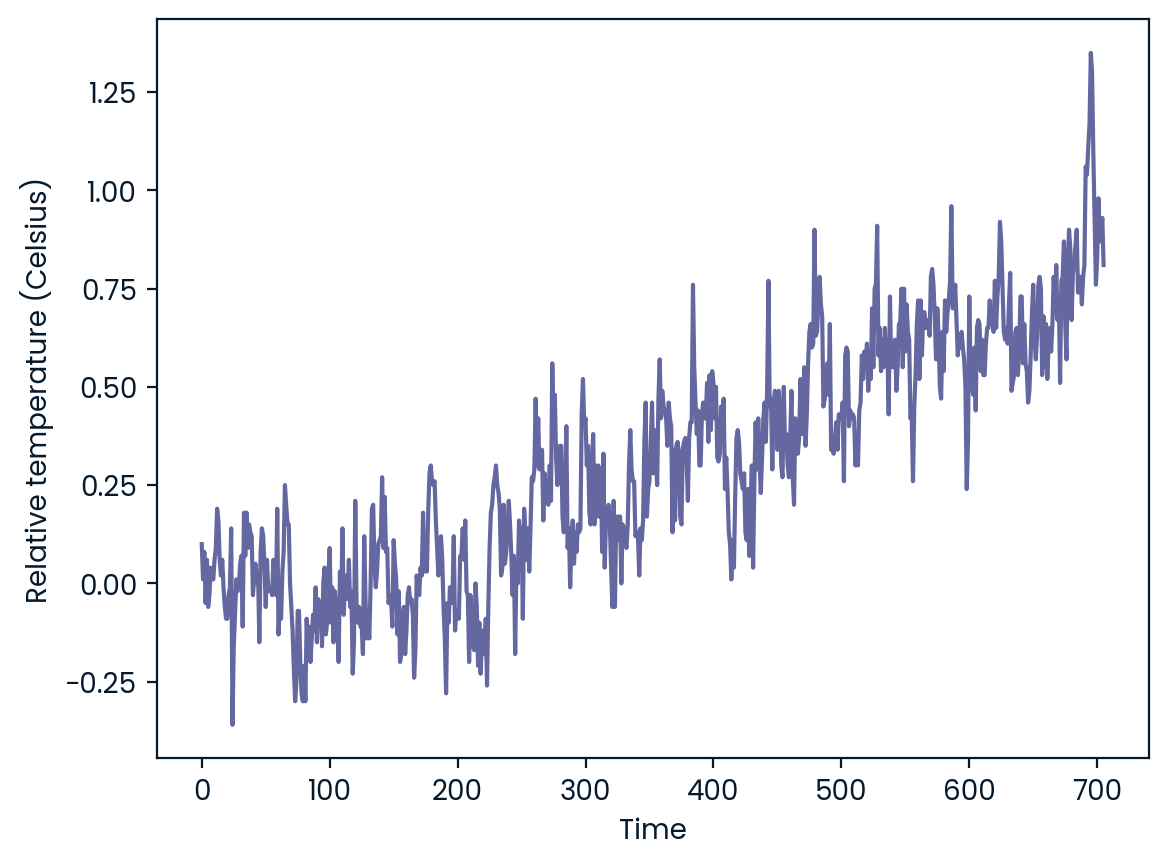

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label 
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

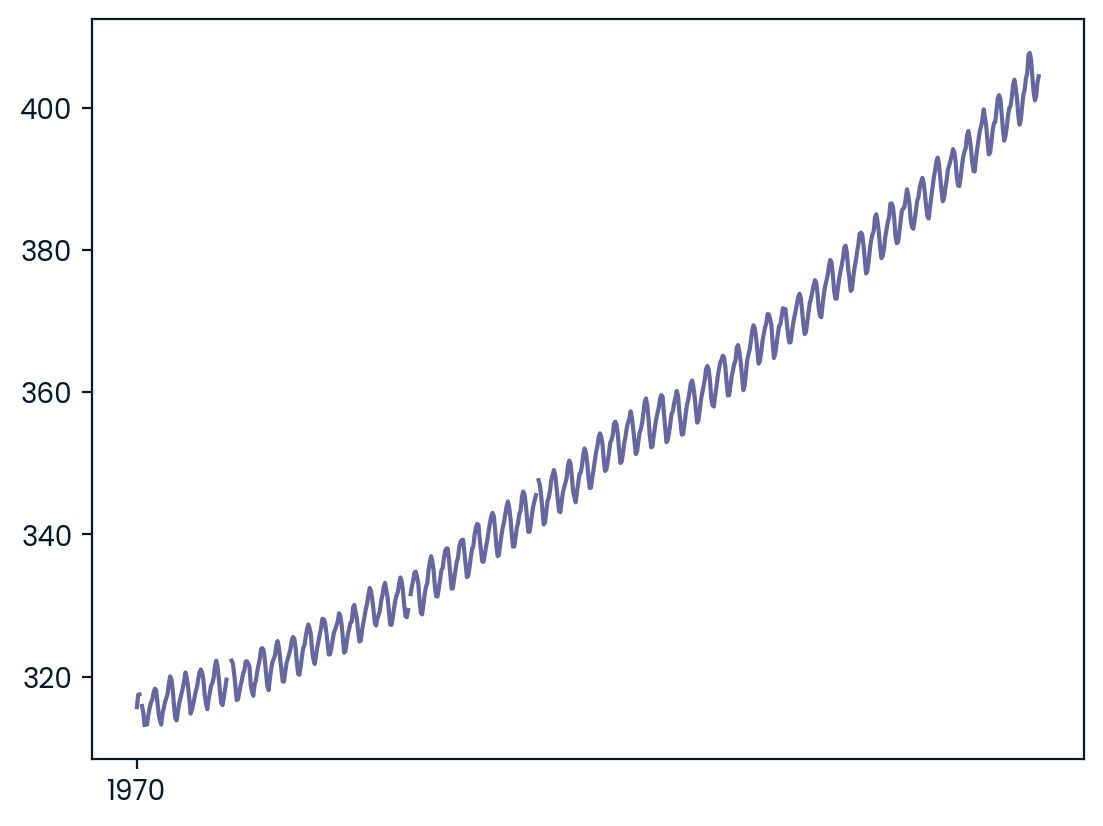

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'climate_change' DataFrame has a DateTimeIndex
climate_change.index = pd.to_datetime(climate_change.index)

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

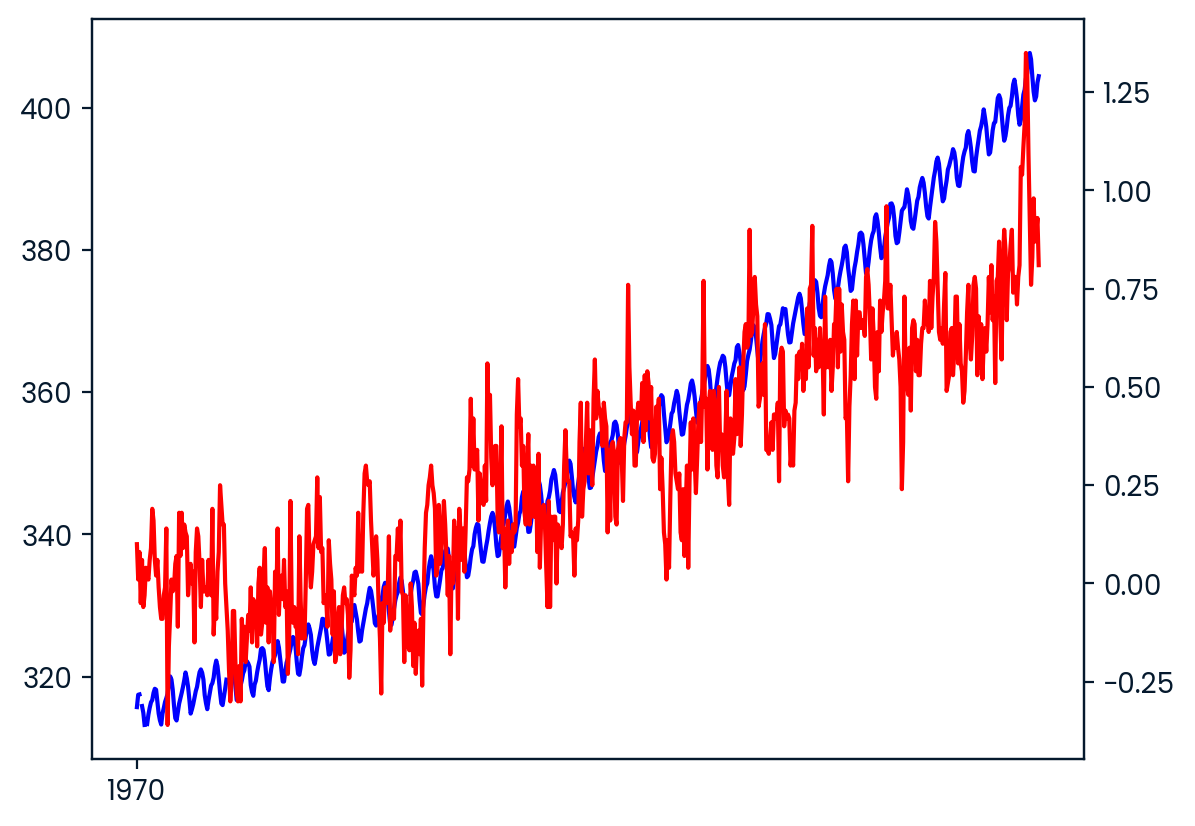

In [27]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig ,ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

In [28]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

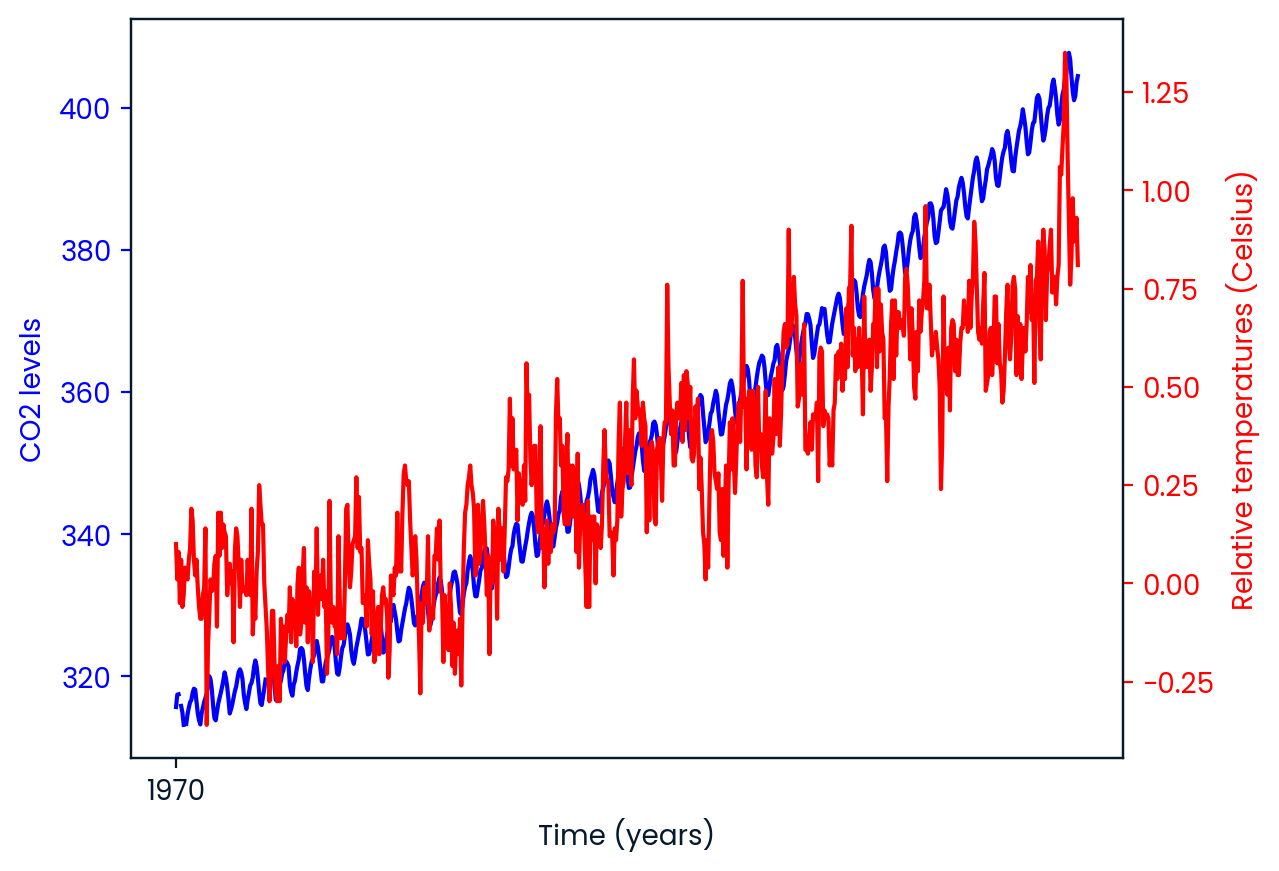

In [29]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,climate_change.index, climate_change['co2'],"blue","Time (years)" , "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2,climate_change.index, climate_change['relative_temp'],"red","Time (years)" , "Relative temperatures (Celsius)")

plt.show()

- **Annotation**

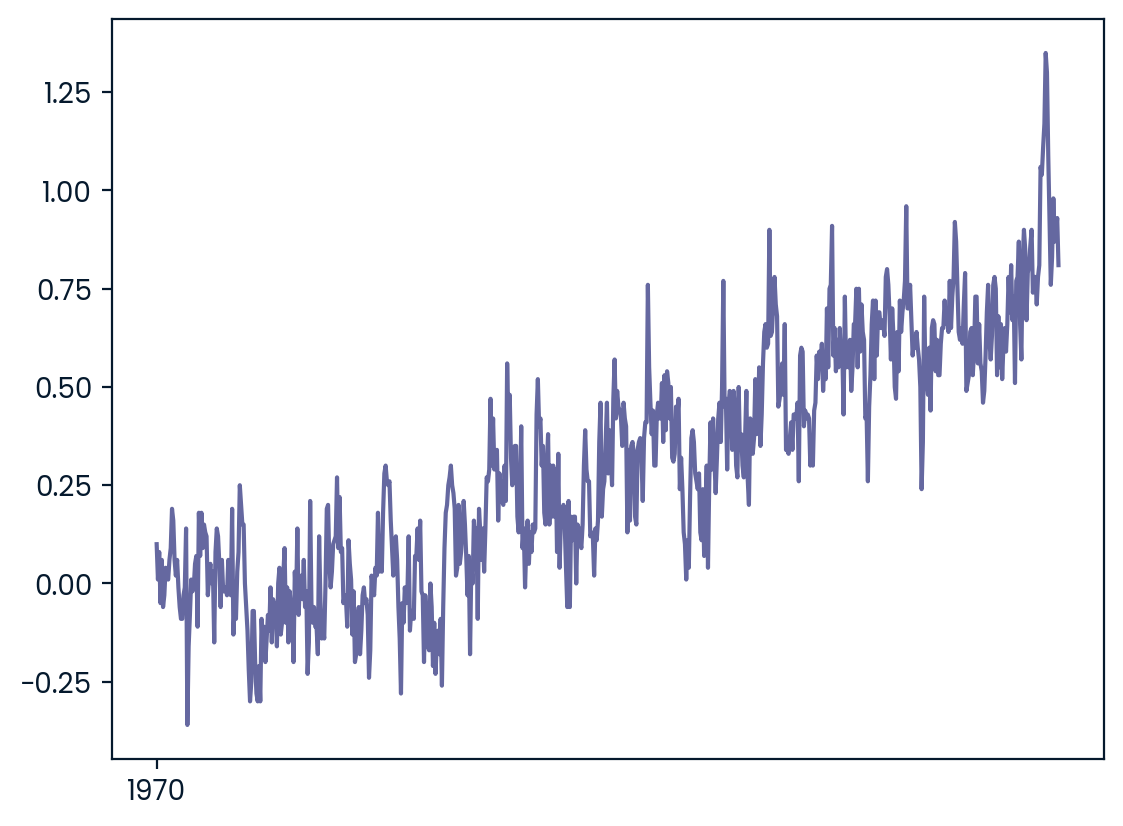

In [30]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'),1))

plt.show()

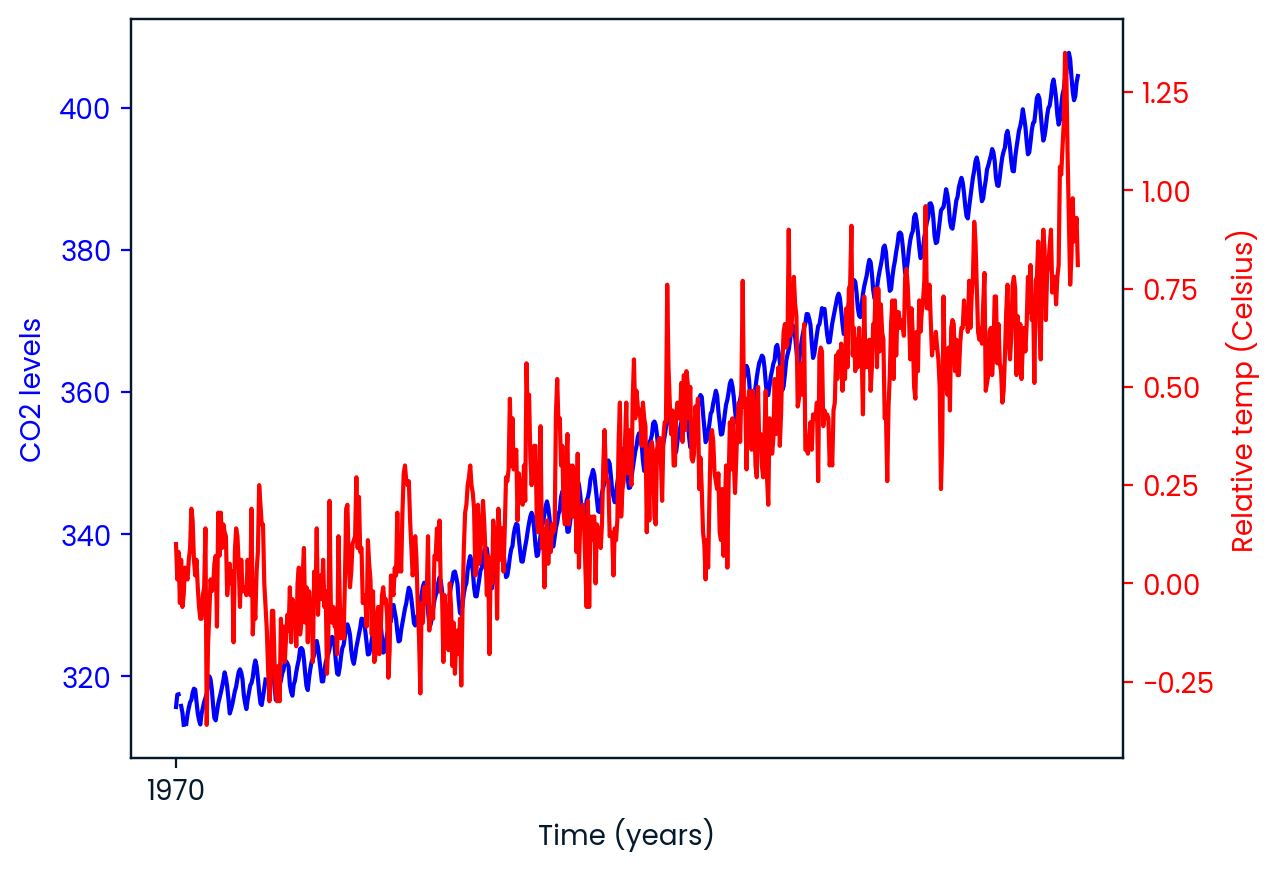

In [31]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue','Time (years)' , 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red','Time (years)' , 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", (pd.Timestamp('2015-10-06 00:00:00'),1), xytext=(pd.Timestamp('2008-10-06 00:00:00'),-0.2), arrowprops={'arrowstyle':'->','color':'gray'})

plt.show()

# Visualizaing Bar Charts

In [32]:
import pandas as pd
medals_by_country_2016 = pd.read_csv('datasets/medals_by_country_2016.csv')
medals_by_country_2016

,Unnamed: 0,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30
5,France,21,20,55
6,Australia,25,23,34
7,Italy,24,8,38
8,Canada,61,4,4
9,Japan,34,17,13


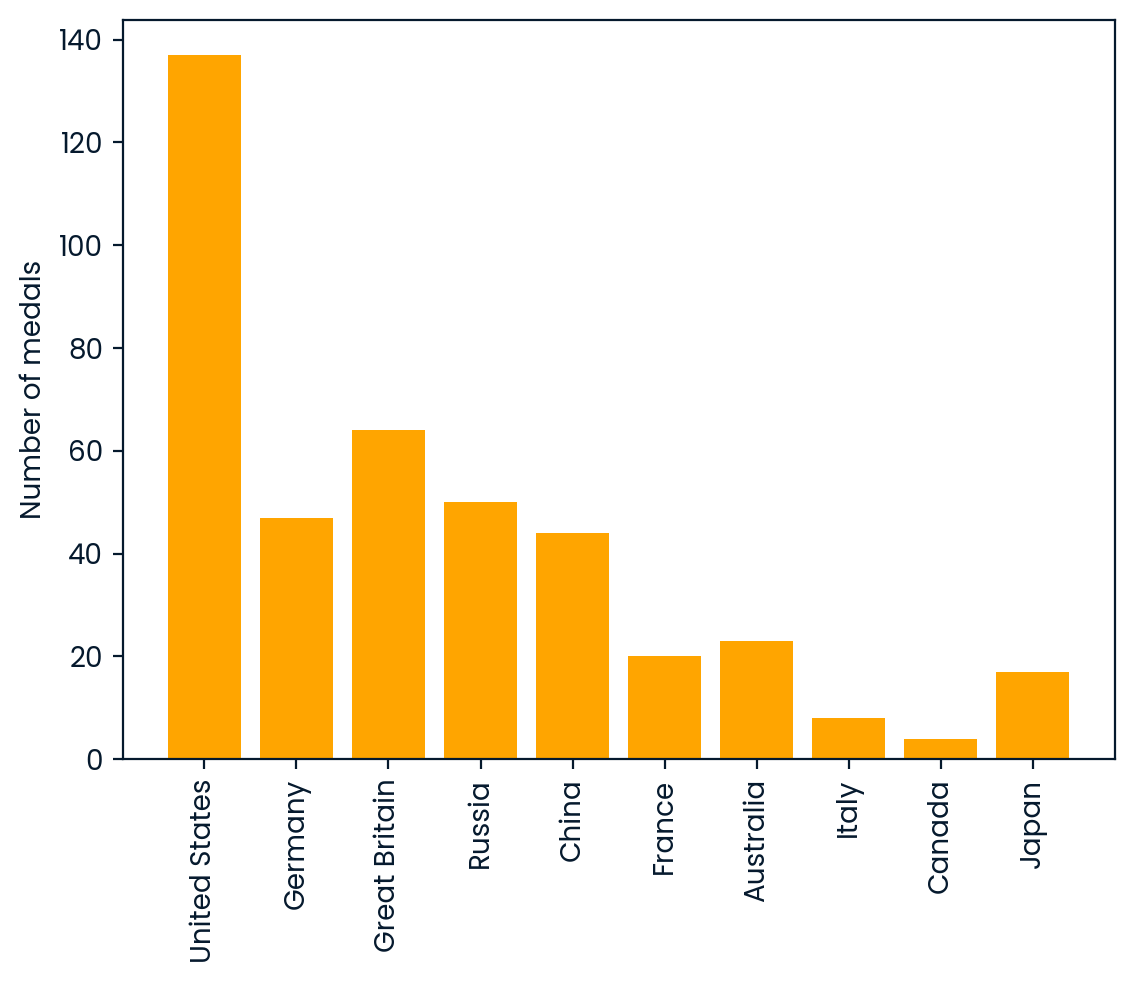

In [33]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'],color='orange')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

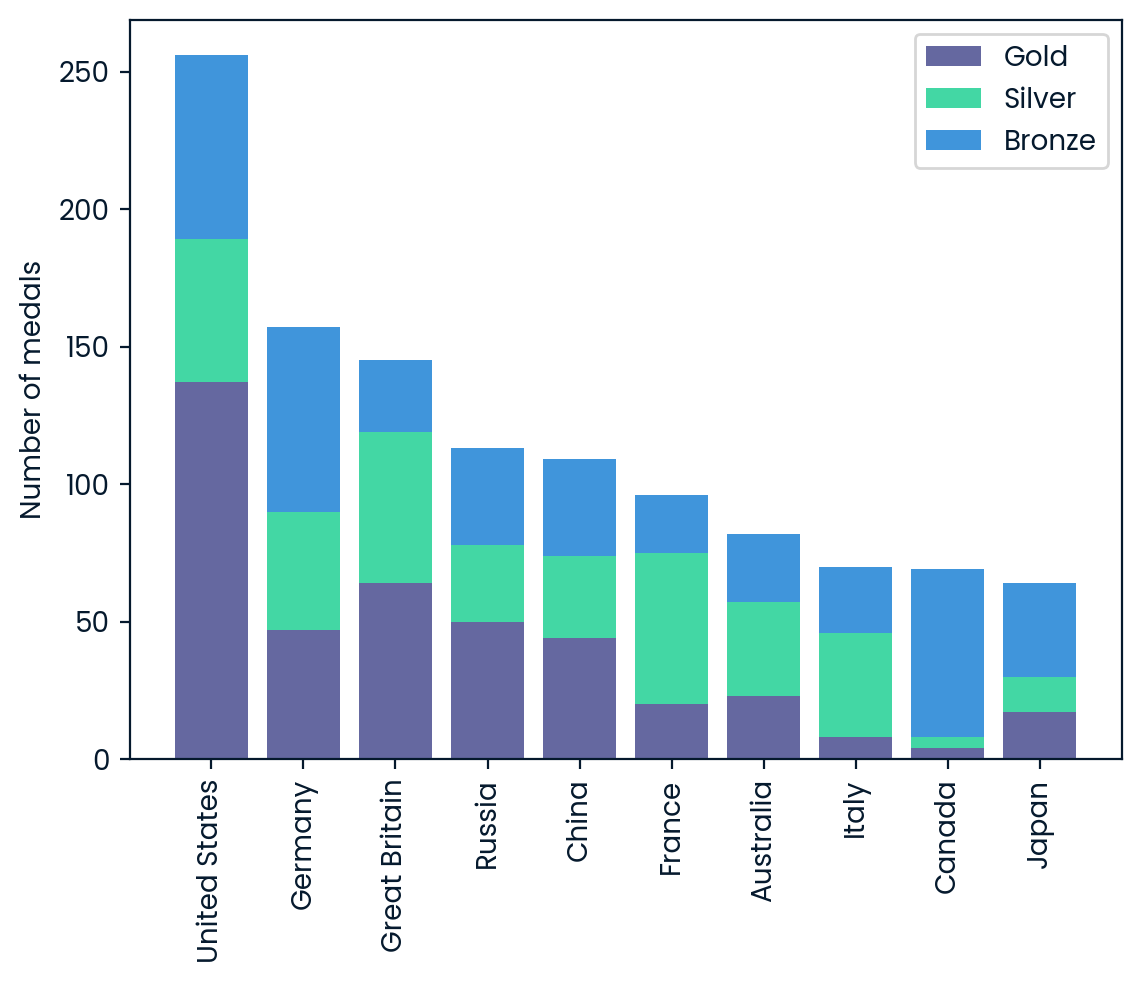

In [34]:
fig, ax = plt.subplots()
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'],label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'],bottom=medals['Gold']+medals['Silver'], label='Bronze' )

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel('Number of medals')
# Display the legend
ax.legend()

plt.show()

NameError: name 'mens_rowing' is not defined

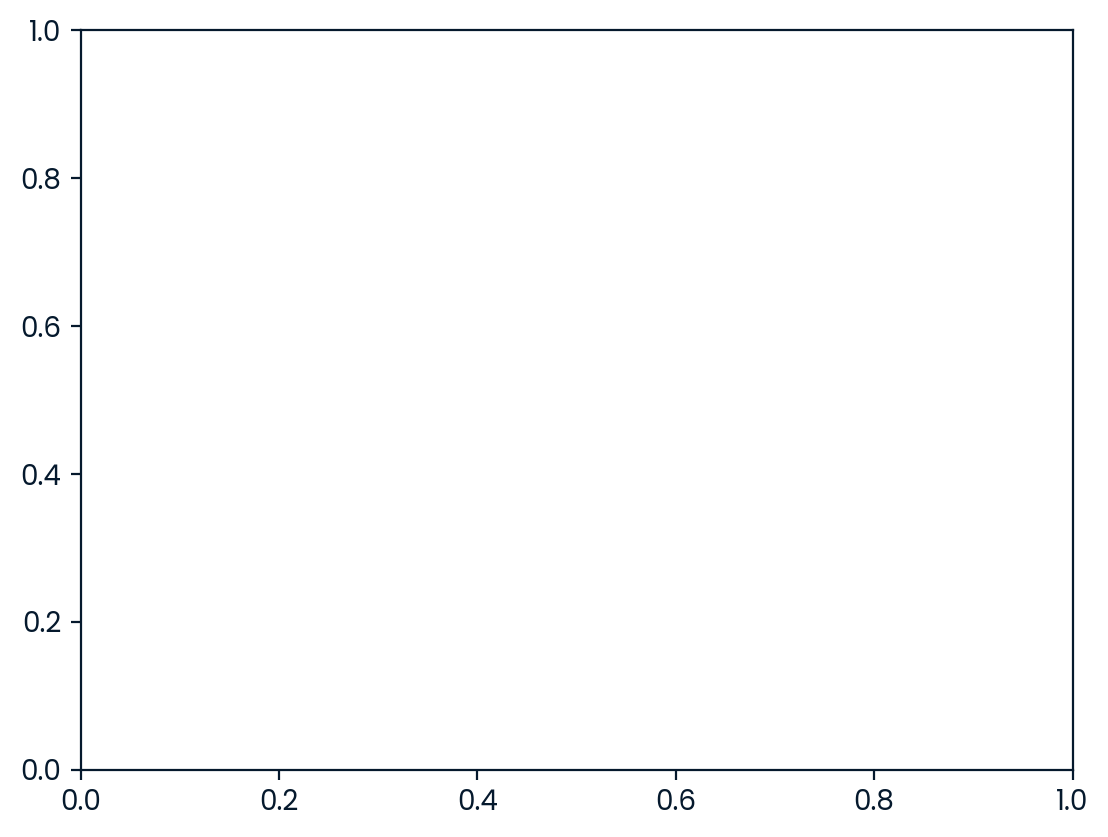

In [ ]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

# Statistical Plotting techniques

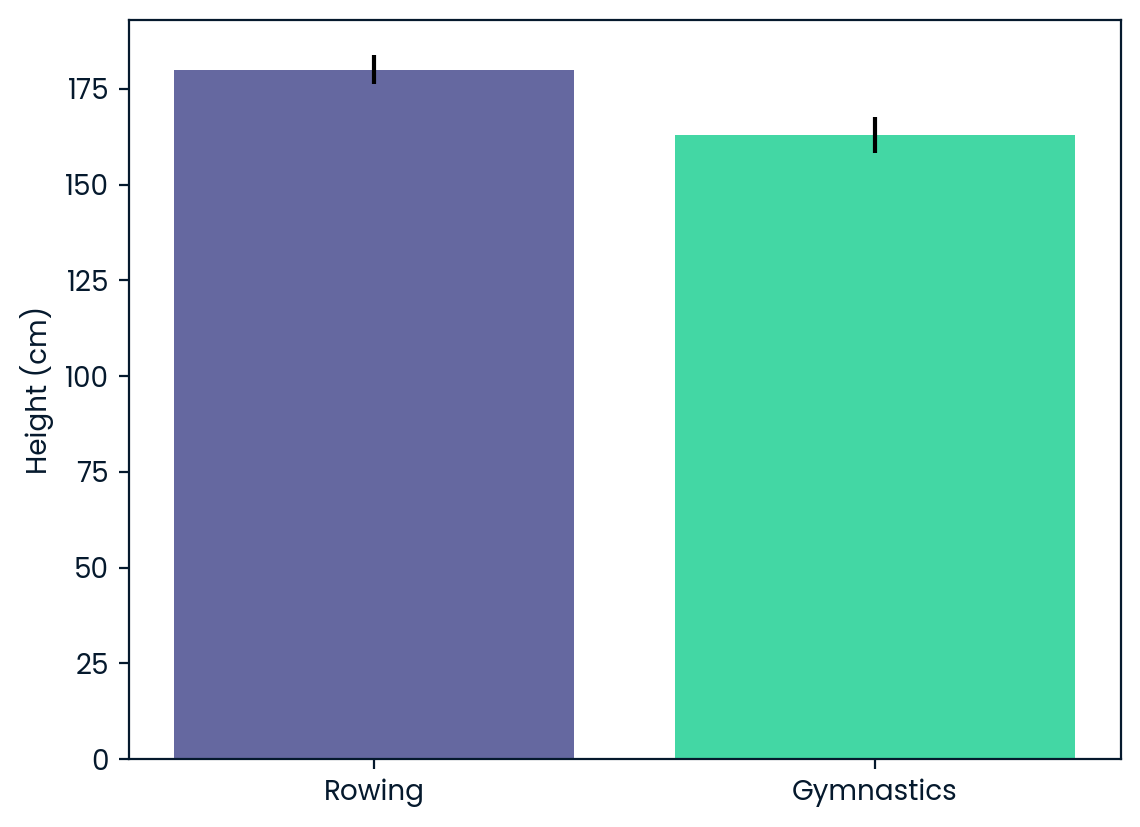

In [39]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing",mens_rowing['Height'].mean() , yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std

ax.bar('Gymnastics',mens_gymnastics['Height'].mean(),yerr=mens_gymnastics['Height'].std())

# Label the y-axis

ax.set_ylabel('Height (cm)')

plt.show()

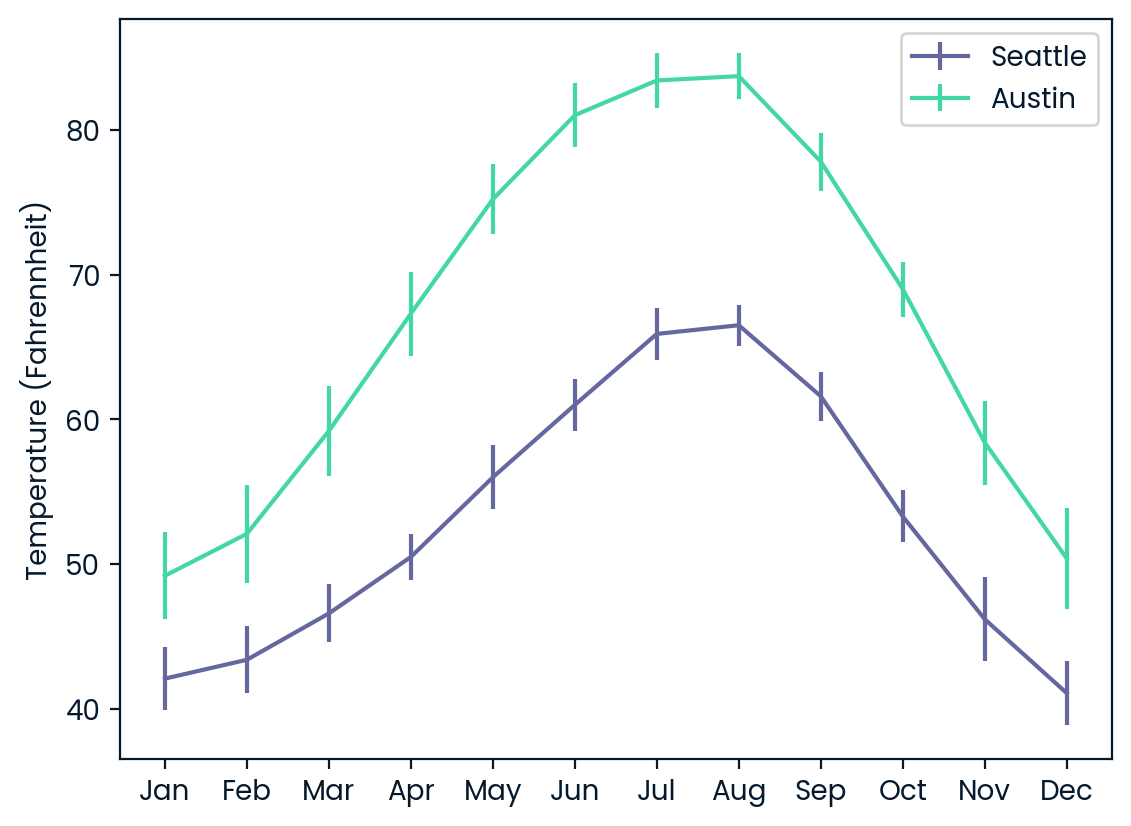

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'],yerr=seattle_weather['MLY-TAVG-STDDEV'],label='Seattle')

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'],austin_weather['MLY-TAVG-NORMAL'],yerr=austin_weather['MLY-TAVG-STDDEV'],label='Austin')

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrennheit)')
ax.legend()
plt.show()

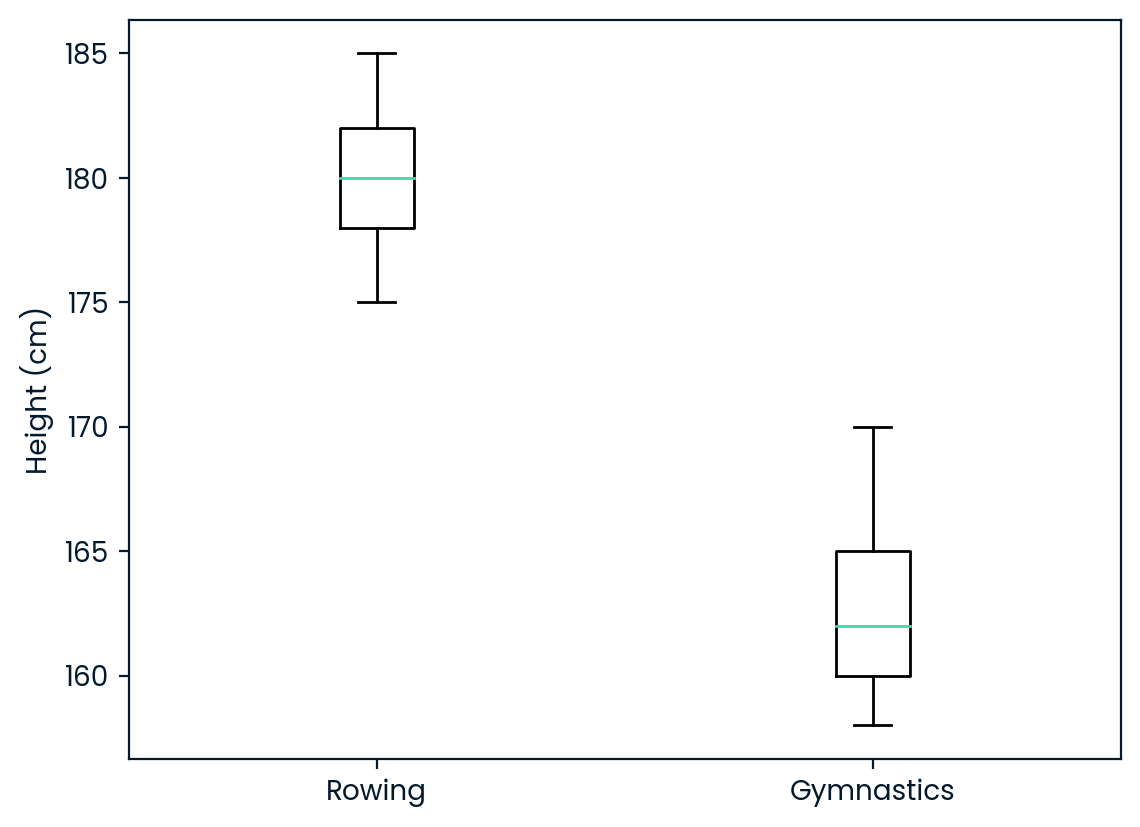

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration purposes
data_rowing = {'Height': [180, 182, 175, 178, 185]}
data_gymnastics = {'Height': [160, 162, 158, 165, 170]}

# Create DataFrames
mens_rowing = pd.DataFrame(data_rowing)
mens_gymnastics = pd.DataFrame(data_gymnastics)

fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

# Scatter Plot

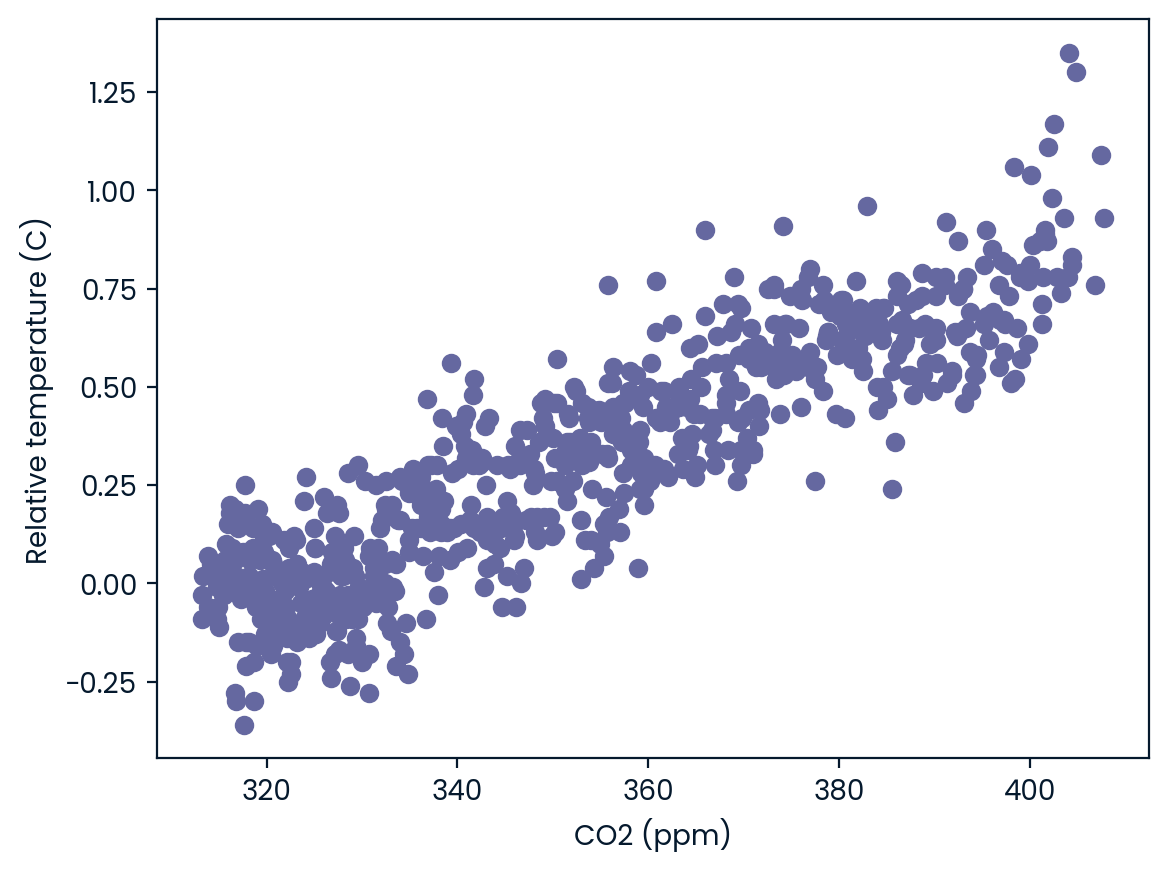

In [40]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

- The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

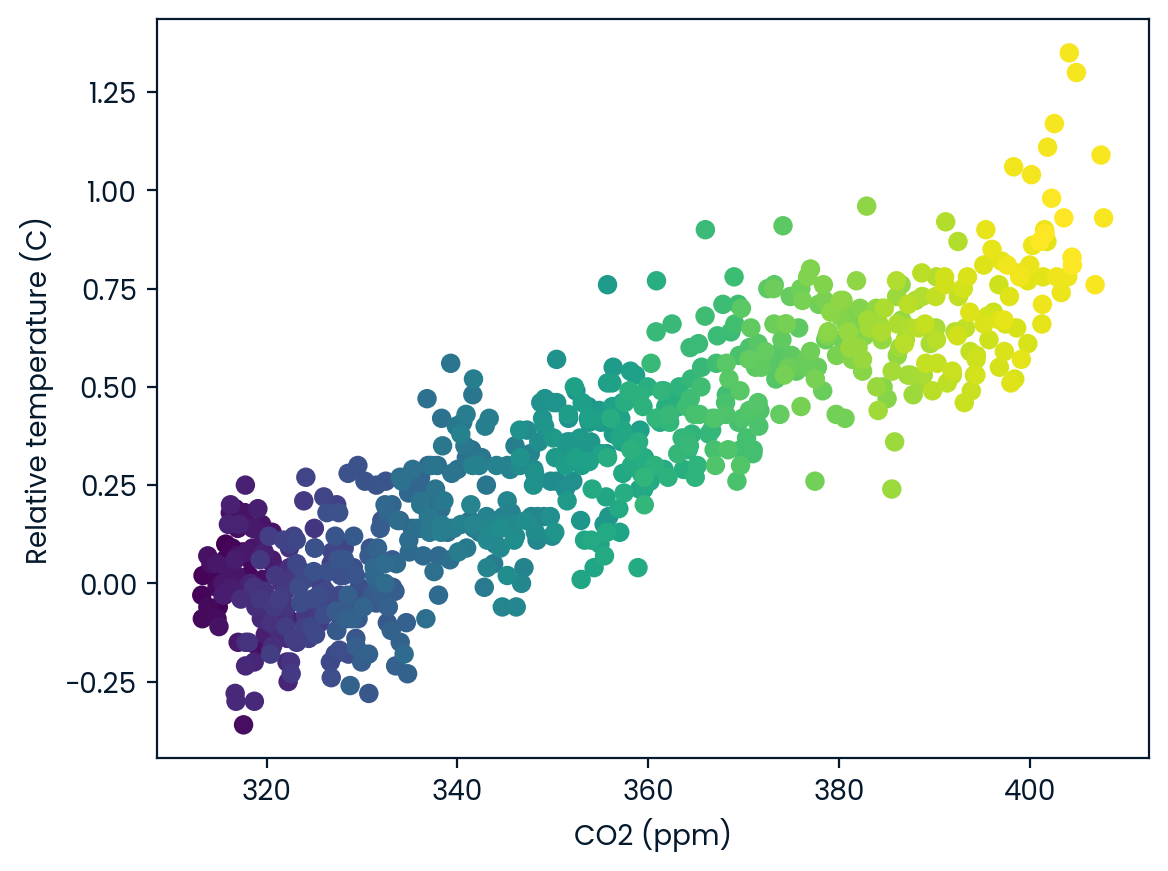

In [41]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'],climate_change['relative_temp'],c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

# Sharing Visualizations with Other

- ## Selecting Different Styles
-  _use --> plt.style.use()_

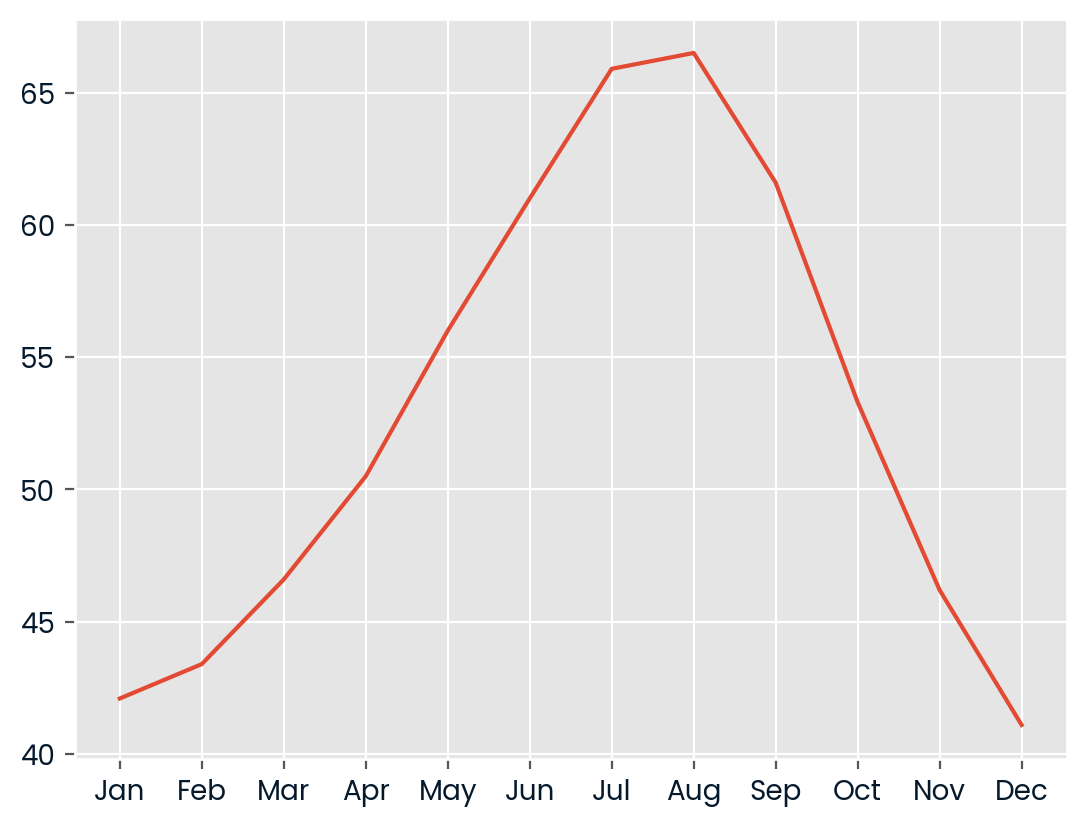

In [42]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax=plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

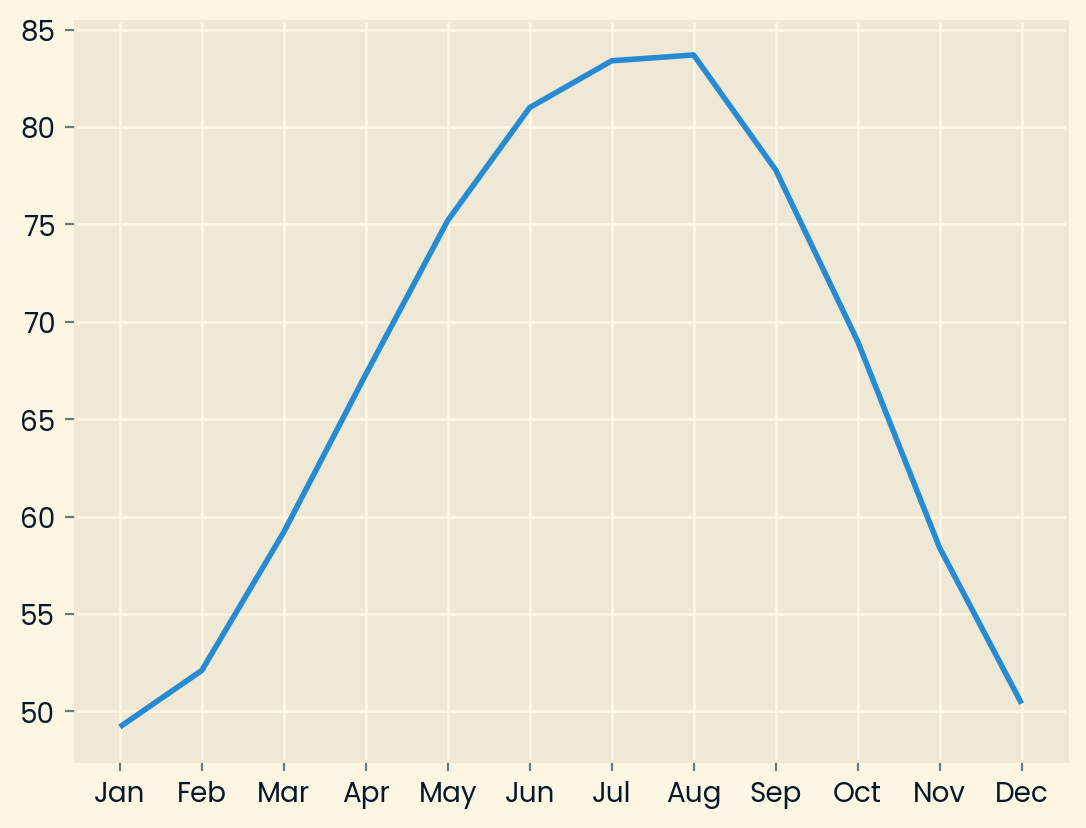

In [43]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

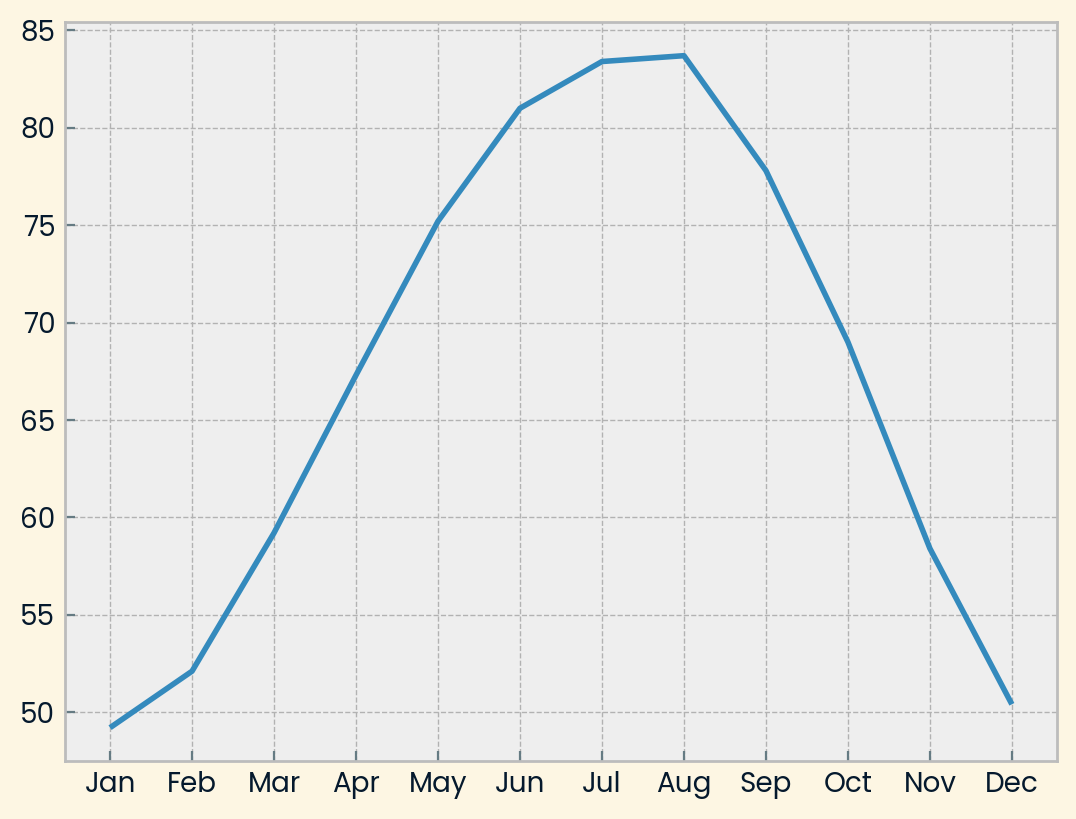

In [44]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

## Saving Your Visualizations

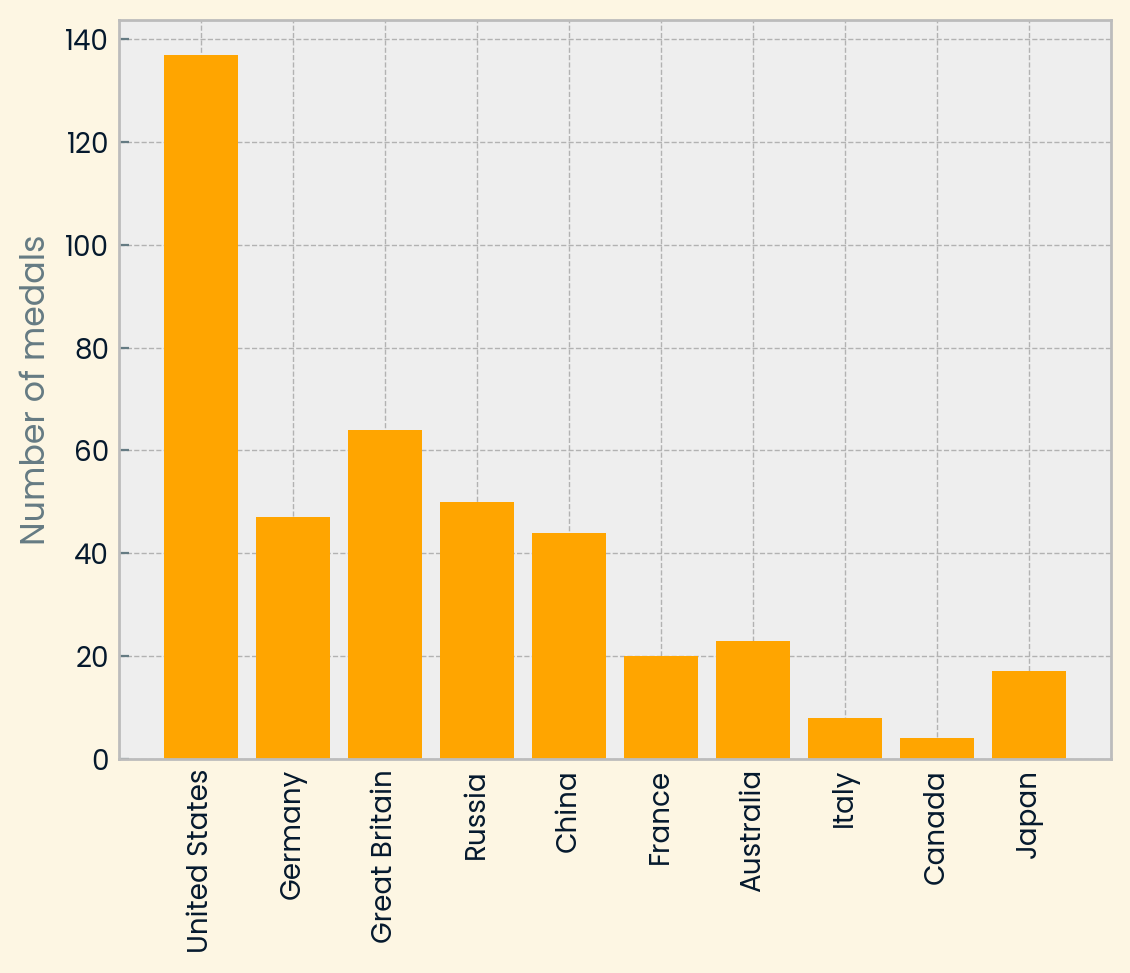

In [45]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'],color='orange')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

In [47]:
fig.savefig('Gold_medals_300_dpi.png',dpi=300)

In [50]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([5,5])
fig.savefig('figure_5_5.png')

## File Formats
1. fig.savefig('figure.png')
2. fig.savefig('figure.jpg')
3. fig.savefig('figure.svg') # if you want to edit your pic after esaving,e.g adobe photoshop
## Set Resolution
fig.savefig('figure.png',dpi=300) # use **dpi**
## Set Size
- fig.set_size_inches([5,3]) # first parameters is widht ,2nd is height


- ## Automating Fugures from Data

In [53]:
import pandas as pd
summer_2016_medals = pd.read_csv('datasets/summer2016.csv')
summer_2016_medals

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
2010,270111,135132,Bojana ivkovi,F,28.0,186.0,72.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
2011,270281,135205,Shakhobiddin Shokirovich Zoirov,M,23.0,169.0,52.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
2012,270370,135245,Milenko Zori,M,27.0,179.0,73.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


In [55]:
#extract the sport column from the dataframe
sports_column = summer_2016_medals['Sport']
# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


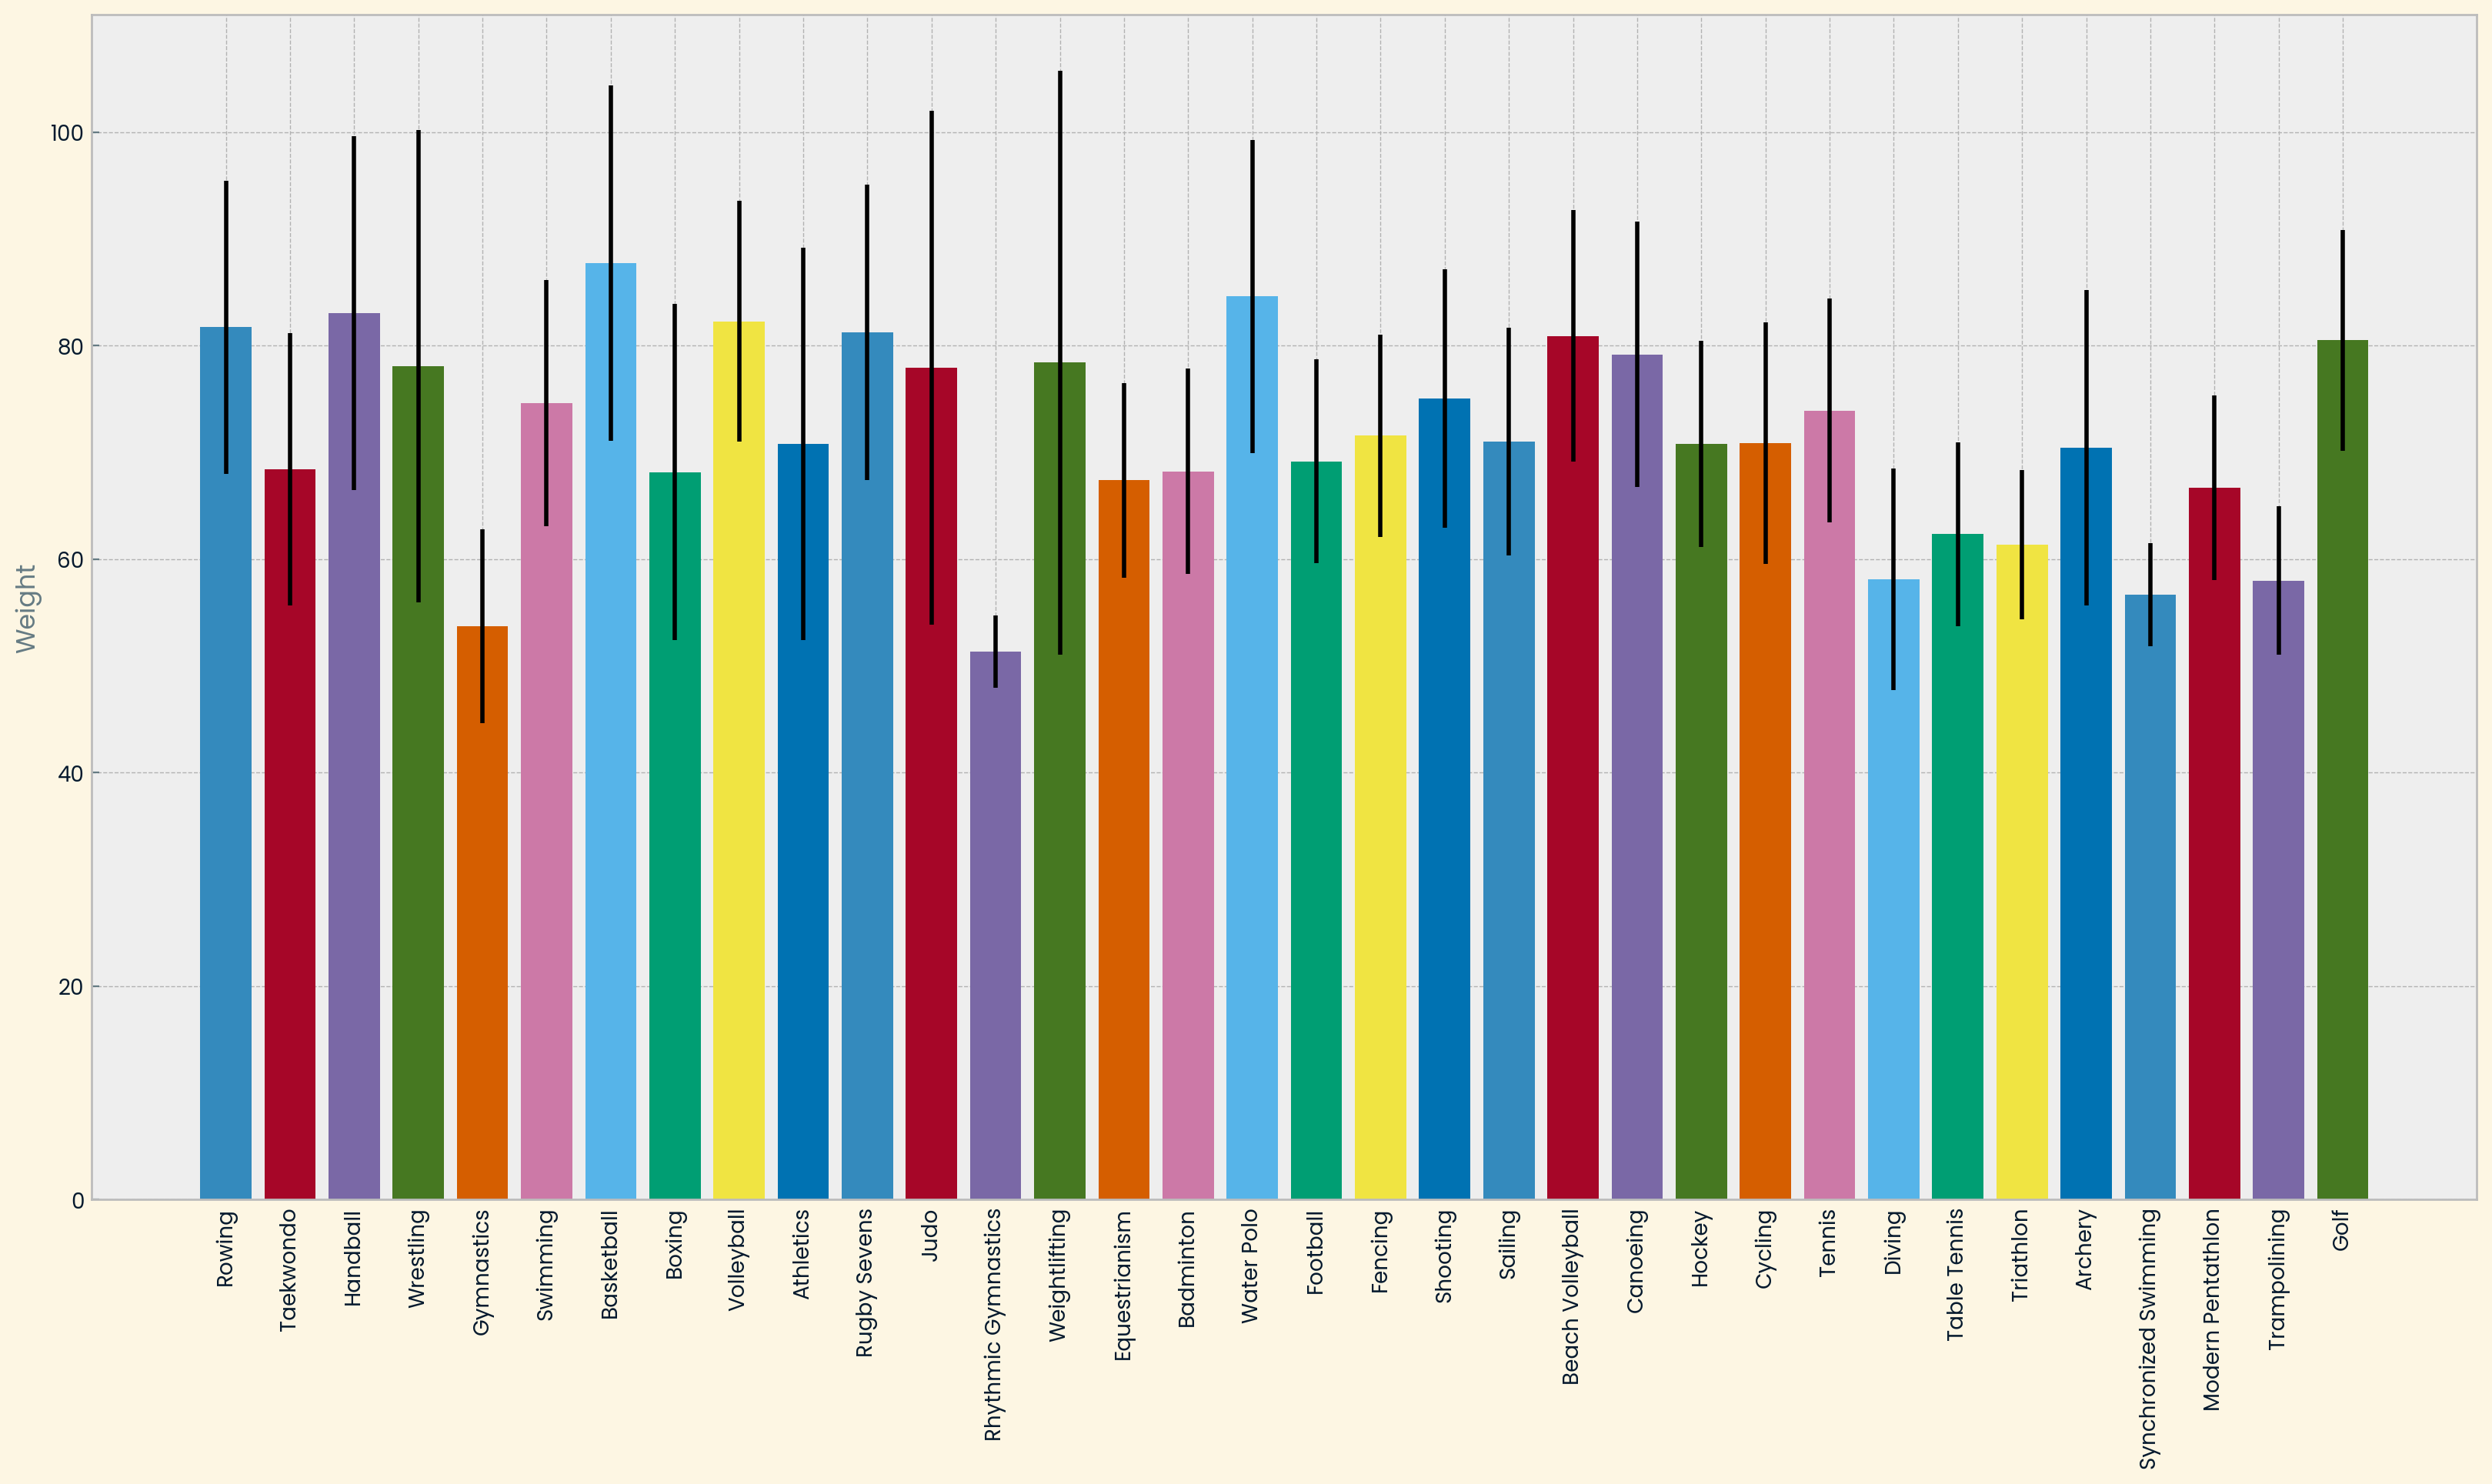

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches([20,10])
# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

plt.show()
# Save the figure to file
fig.savefig("sports_weights.png")